<a href="https://colab.research.google.com/github/hamagami/anomaly-detection/blob/main/02_01_T2%E6%A4%9C%E5%AE%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# カイ二乗検定による異常検知

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2

In [ ]:
mean=3.15
var=2.114
dnum=1000
data=np.random.normal(mean, var, dnum)

In [ ]:
param = norm.fit(data) 
x = np.linspace(-5,12,100) 
pdf_fitted = norm.pdf(x, loc=param[0], scale=param[1]) # 

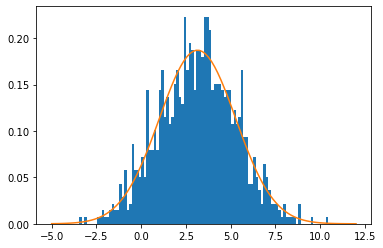

In [ ]:
plt.hist(data,bins=100,density=1)
plt.plot(x,pdf_fitted)
plt.show()

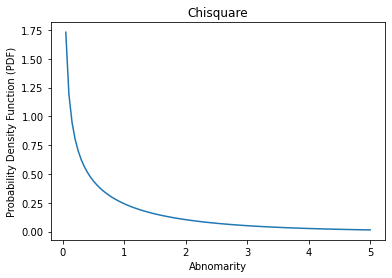

In [ ]:
x = np.linspace(0,5,100) # x軸の値を作成
chi_2 = chi2.pdf(x, 1, scale=1) # 自由度1, スケール因子1のχ2乗分布
plt.plot(x,chi_2) # χ2乗分布の表示
plt.title("Chisquare")
plt.xlabel("Abnomarity")
plt.ylabel("Probability Density Function (PDF)")
plt.show()

In [ ]:
def predict(X, param, th):
    a = ((X - param[0])/param[1])**2 # 異常度の計算
    pred = np.zeros_like(a) # 予測したラベル（すべて0（悪性）として初期化）
    pred[a <= th] = 1 # 異常値が閾値を下回る場合は、ラベルを1（良性）とする
    return pred # 予測を返す

In [ ]:
th_prob=0.95
anop  = chi2.ppf(th_prob, 1, scale=1) 
print("prob=",th_prob,">>> ch2=",anop)
p= predict(data,param,anop)
ano=data[p==0]

prob= 0.95 >>> ch2= 3.841458820694124


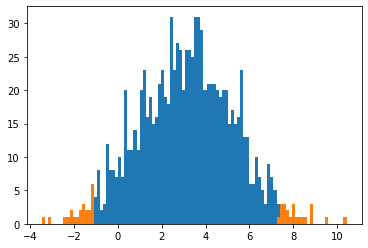

In [ ]:
plt.hist(data,bins=100)
plt.hist(ano,bins=100)
plt.show()